# Test the Kenvin investment method

Is it better to invest 18k at the start of the year all at once or to spread out the 18k into 12 monthly payments?

Hypothosis: Since the market grows on average 7% per year, it is more benefitial to invest a lump sum at the begining of the year to utilize the full potential of the earing. By spearding the payment out over 1 year an investor loses out on roughly 1/2 the gain in a year, which is then compounded yearly.

Solution 1: Simulate using the historical GSCP data, starting at varius years.
plot: difference in gain vs. N years.

Solution 2: Find yearly and monthly gian distributions and simulate n years.


In [213]:
from __future__ import division
import datetime

import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns

%pylab inline
pylab.rcParams['figure.figsize'] = (12.0, 6.0) # set size of figures"
plt.rcParams.update({'font.size': 18})



Populating the interactive namespace from numpy and matplotlib


In [18]:
dataframe = pd.read_csv('/Users/attiladobi/Downloads/GSPC.csv')

In [35]:
dataframe.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,dt
17145,2018-02-22,2710.419922,2731.260010,2697.770020,2703.959961,2703.959961,3701270000,2018-02-22
17146,2018-02-23,2715.800049,2747.760010,2713.739990,2747.300049,2747.300049,3189190000,2018-02-23
17147,2018-02-26,2757.370117,2780.639893,2753.780029,2779.600098,2779.600098,3424650000,2018-02-26
17148,2018-02-27,2780.449951,2789.149902,2744.219971,2744.280029,2744.280029,3745080000,2018-02-27
17149,2018-02-28,2753.780029,2761.520020,2713.540039,2713.830078,2713.830078,4230660000,2018-02-28


In [25]:
dataframe['dt'] = pd.to_datetime(dataframe['Date'])

# Reduce to first entry of the year

In [46]:
# One way to do it, find the first of year and merge.
#first_of_year = dataframe.groupby(dataframe['dt'].dt.year)[['dt']].nth(0)
#df_year = dataframe.merge(first_of_year, how='right', on='dt')


In [69]:
df_year_start = dataframe.groupby(dataframe['dt'].dt.year)[['dt', 'Close']].nth(0)
df_year_start.index.name = 'year'
df_year_start.head()


,dt,Close
year,,
1950,1950-01-03,16.660000
1951,1951-01-02,20.770000
1952,1952-01-02,23.799999
1953,1953-01-02,26.540001
1954,1954-01-04,24.950001


# Reduce to first entry of the month

In [70]:
df_month_start = dataframe.groupby([dataframe['dt'].dt.year, dataframe['dt'].dt.month])[['dt', 'Close']].nth(0)
df_month_start.index.names = ['year', 'month']
df_month_start.head()


dt      Close
year month                      
1950 1     1950-01-03  16.660000
     2     1950-02-01  17.049999
     3     1950-03-01  17.240000
     4     1950-04-03  17.530001
     5     1950-05-01  18.219999

# Test code and print

In [119]:
# Length of time for the investment.
years_invested = 10
yearly_investment = 18

year_min = dataframe['dt'].dt.year.min()
year_max = dataframe['dt'].dt.year.max() - years_invested

# Randomize the start year.
start_year = randint(year_min, year_max + 1)
end_year = start_year + years_invested
print 'Start year: %s' % start_year
print 'End year: %s' % end_year

# Profit from yearly investment. [2, 1.5, 1.3] * [18, 18, 18] = [36, 27, 24] => new_value
yearly_multiplier = 0

final_price = df_year_start.loc[end_year]['Close']
# Loop through years from start year and figure the profits.
for year in range(start_year, end_year):
    buy_price = df_year_start.loc[year]['Close']
    # The fractional gain of the original 18k investment (or any investment)
    yearly_multiplier += final_price / buy_price

final_value = yearly_investment * yearly_multiplier
total_invested = yearly_investment * years_invested
fractional_gain = (final_value - total_invested) / total_invested

print 'For the yearly investment method (Kevin):'
print 'The multiplier is: %.2f' % yearly_multiplier
print 'The total investment is $%.2f' % total_invested
print 'The final value: $%.2f' % final_value
print 'The percent gain on investment is: %.2f%%' % (fractional_gain * 100)


Start year: 1994
End year: 2004
The multiplier is: 13.93
The total investment is $180.00
The final value: $250.74
The percent gain on investment is: 39.30%


In [123]:
# Profit from monthly investment.
monthly_multiplier = 0

final_price = df_month_start.loc[(end_year, 1)]['Close']
# Loop through years from start year and figure the profits.
for year in range(start_year, end_year):
    for month in range(1, 13):
        buy_price = df_month_start.loc[(year, month)]['Close']
        # The fractional gain of the original 18k investment (or any investment)
        monthly_multiplier += final_price / buy_price

final_value = yearly_investment / 12 * monthly_multiplier
total_invested = yearly_investment * years_invested
fractional_gain = (final_value - total_invested) / total_invested

print 'For the monthly investment method (normal people):'
print 'The multiplier is: %.2f' % monthly_multiplier
print 'The total investment is $%.2f' % total_invested
print 'The final value: $%.2f' % final_value
print 'The percent gain on investment is: %.2f%%' % (fractional_gain * 100)

The multiplier is: 159.92
The total investment is $180.00
The final value: $239.89
The percent gain on investment is: 33.27%


# Clean up code, write into a function

In [122]:
def sim_yearly(df, start_year, end_year):
    # Profit from yearly investment.
    yearly_multiplier = 0

    final_price = df.loc[end_year]['Close']
    for year in range(start_year, end_year):
        buy_price = df.loc[year]['Close']
        yearly_multiplier += final_price / buy_price

    final_value = yearly_investment * yearly_multiplier
    total_invested = yearly_investment * years_invested
    fractional_gain = (final_value - total_invested) / total_invested
    return fractional_gain

def sim_monthly(df, start_year, end_year):
    # Profit from monthly investment.
    monthly_multiplier = 0

    final_price = df.loc[(end_year, 1)]['Close']
    for year in range(start_year, end_year):
        for month in range(1, 13):
            buy_price = df.loc[(year, month)]['Close']
            monthly_multiplier += final_price / buy_price

    final_value = yearly_investment / 12 * monthly_multiplier
    total_invested = yearly_investment * years_invested
    fractional_gain = (final_value - total_invested) / total_invested
    return fractional_gain


In [252]:

year_min = dataframe['dt'].dt.year.min()
yearly_data = []

for years_invested in xrange(1, 31):
    year_max = dataframe['dt'].dt.year.max() - years_invested
    # Loop through all possible start years.
    yearly_gains = []
    monthly_gains = []
    for start_year in range(year_min, year_max + 1):
        end_year = start_year + years_invested

        yearly_gains.append(sim_yearly(df_year_start, start_year, end_year))
        monthly_gains.append(sim_monthly(df_month_start, start_year, end_year))


    mean_yearly = mean(yearly_gains)
    mean_monthly = mean(monthly_gains)
    # Not a normal distribution. The means are highly correlated.
    diff = np.array(yearly_gains) - np.array(monthly_gains)
    mean_diff = np.mean(diff)
    median_diff = np.median(diff)
    std_diff = np.std(diff)
    n_sim = len(yearly_gains)
    print 'Average difference at %s years is %s' % (years_invested, mean_yearly - mean_monthly)

    yearly_data.append({'years': years_invested, 
                        'mean_yearly_gain': mean_yearly, 
                        'std_yearly_gain': std(yearly_gains), 
                        'mean_monthly_gain': mean_monthly, 
                        'std_monthly_gain': std(monthly_gains),
                        'n_sim': n_sim,
                        'mean_diff': mean_diff,
                        'median_diff': median_diff,
                        'std_diff': std_diff,
                       }
                       )
            

Average difference at 1 years is 0.0391789847097
Average difference at 2 years is 0.0390790087675
Average difference at 3 years is 0.0392789134476
Average difference at 4 years is 0.0404167420106
Average difference at 5 years is 0.0431444896557
Average difference at 6 years is 0.0440123580343
Average difference at 7 years is 0.0446936506846
Average difference at 8 years is 0.0459461327938
Average difference at 9 years is 0.0482669045445
Average difference at 10 years is 0.0504501724219
Average difference at 11 years is 0.0535730042188
Average difference at 12 years is 0.0569090829396
Average difference at 13 years is 0.0600233393982
Average difference at 14 years is 0.0638044507977
Average difference at 15 years is 0.0674011963114
Average difference at 16 years is 0.0701357432697
Average difference at 17 years is 0.0734712136517
Average difference at 18 years is 0.0775031520023
Average difference at 19 years is 0.0817533392523
Average difference at 20 years is 0.0856636946102
Average d

(array([ 13.,   3.,   1.,   8.,   3.,   3.,   4.,   2.,   1.,   1.]),
 array([ 0.04804502,  0.07329573,  0.09854644,  0.12379715,  0.14904786,
         0.17429857,  0.19954928,  0.22479999,  0.2500507 ,  0.27530141,
         0.30055212]),
 <a list of 10 Patch objects>)

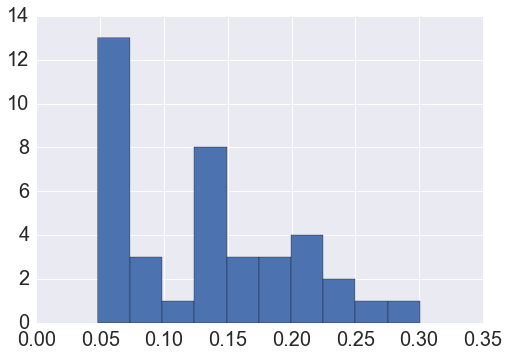

In [249]:
plt.hist(diff)

In [253]:
gains_df = pd.DataFrame.from_records(yearly_data)
gains_df.head()


,mean_diff,mean_monthly_gain,mean_yearly_gain,median_diff,n_sim,std_diff,std_monthly_gain,std_yearly_gain,years
0,0.039179,0.051236,0.090415,0.039417,68,0.088094,0.090798,0.161524,1
1,0.039079,0.096205,0.135284,0.038623,67,0.064682,0.132679,0.181210,2
2,0.039279,0.141212,0.180491,0.032125,66,0.055414,0.161490,0.201644,3
3,0.040417,0.188147,0.228564,0.037833,65,0.051714,0.192180,0.230471,4
4,0.043144,0.240841,0.283985,0.038290,64,0.052904,0.229024,0.270842,5


The above table shows the percentage increase on the initial investment as a function of years.
mean_monthly_gain and mean_yearly_gain

Since there is a fixed investment every year, that amount needs to be multiplied back yearly.
To compare the gains over the years we have to multiply this difference by the number of years investing.


In [254]:
gains_df['diff_gain'] = gains_df['mean_yearly_gain'] - gains_df['mean_monthly_gain']
gains_df['diff_gain_abs'] = gains_df['diff_gain'] * gains_df['years']

# This is a lost cause, the distribution are far from normal. Also the monthly and yearly methods are highly correlated.
# Instead I will directly measure the std of the diferences (see above).
#gains_df['sig_mean_yearly'] = gains_df['mean_yearly_gain'] / np.sqrt(gains_df['n_sim'])
#gains_df['sig_mean_monthly'] = gains_df['mean_monthly_gain'] / np.sqrt(gains_df['n_sim'])
#gains_df['sig_diff_gain'] = np.sqrt(gains_df['sig_mean_yearly'] ** 2 + gains_df['sig_mean_monthly'] ** 2)

gains_df.tail()


,mean_diff,mean_monthly_gain,mean_yearly_gain,median_diff,n_sim,std_diff,std_monthly_gain,std_yearly_gain,years,diff_gain,diff_gain_abs
25,0.112824,2.166734,2.279558,0.085425,43,0.078992,1.494858,1.562567,26,0.112824,2.933432
26,0.117620,2.345285,2.462905,0.096344,42,0.073947,1.543122,1.604242,27,0.117620,3.175747
27,0.121795,2.527587,2.649381,0.102615,41,0.070824,1.586991,1.643562,28,0.121795,3.410246
28,0.128347,2.729754,2.858101,0.119391,40,0.070478,1.617026,1.670746,29,0.128347,3.722069
29,0.133528,2.946196,3.079724,0.137309,39,0.066993,1.639722,1.686225,30,0.133528,4.005832


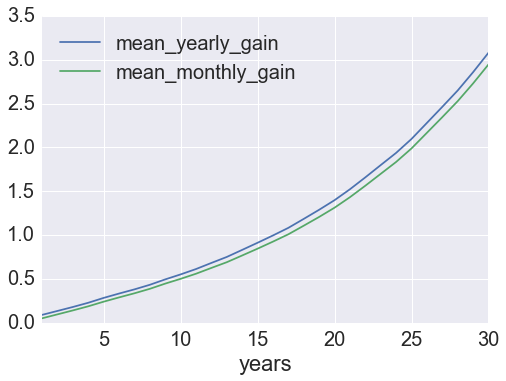

In [255]:
gains_df.plot(x='years', y=['mean_yearly_gain', 'mean_monthly_gain'])
#gains_df.plot(x='years', y=['diff_gain'])
#plt.xlabel('Years of Investing')
#plt.ylabel('Difference in Percentage Gain')
#

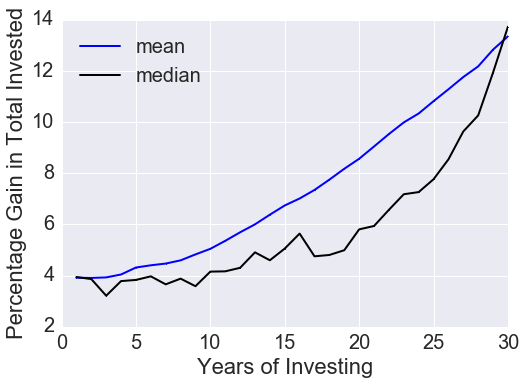

In [265]:
sns.set(font_scale=2)

plt.plot(gains_df['years'], gains_df['diff_gain'] * 100, '.-b', linewidth=2, markersize=2, label='mean')
plt.plot(gains_df['years'], gains_df['median_diff'] * 100, '.-k', linewidth=2, markersize=2, label='median')

plt.xlabel('Years of Investing')
plt.ylabel('Percentage Gain in Total Invested')
plt.legend(loc='upper left')


# How much more money will you have investing 18k per year?

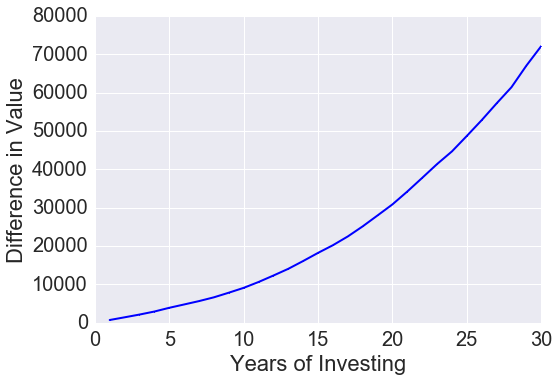

In [258]:
initial_investment = 18000

plt.plot(gains_df['years'], gains_df['diff_gain_abs'] * initial_investment, '.-b', linewidth=2, markersize=2)

plt.xlabel('Years of Investing')
plt.ylabel('Difference in Value')


In [259]:
print 'You can expect $%d more' % (gains_df['diff_gain_abs'].iloc[-1] * initial_investment)

You can expect $72104 more


<Container object of 3 artists>

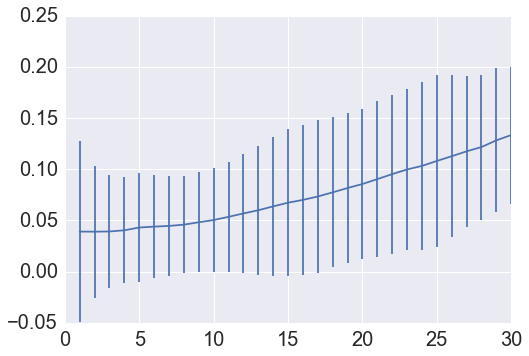

In [260]:
# Sigma of the diftribution
plt.errorbar(gains_df['years'], gains_df['mean_diff'], gains_df['std_diff'])

<Container object of 3 artists>

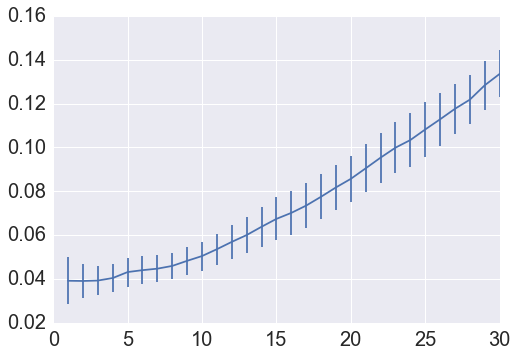

In [261]:
# Sigma of the mean
plt.errorbar(gains_df['years'], gains_df['mean_diff'], gains_df['std_diff'] / np.sqrt(gains_df['n_sim']))


## Sanity check. The difference in the yearly vs. monthly investment method (10 year term)

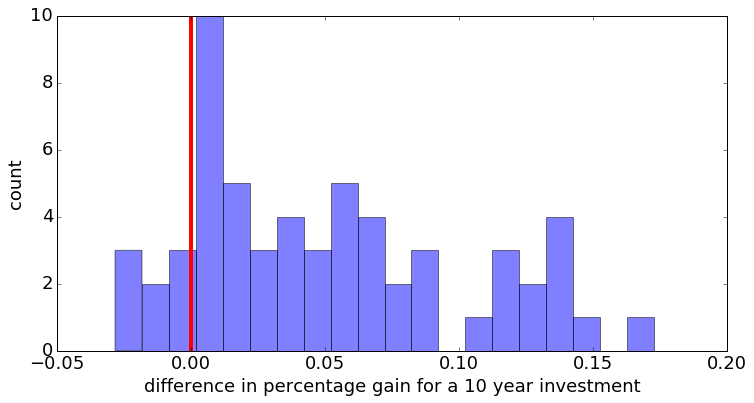

In [157]:
#
plt.hist(np.array(yearly_gains) - np.array(monthly_gains), bins=20, alpha=0.5)
plt.plot([0, 0], [0, 10], 'r', linewidth=4)
plt.xlabel('difference in percentage gain for a 10 year investment')
plt.ylabel('count')